## Visualización de Datos

En este video, se explora cómo construir **histogramas** y **boxplots**.

Estos gráficos permiten para visualizar dónde están concentrados los datos y sacar conclusiones exploratorias de cómo están distribuidos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\COVID_pruebas\base_datos_2008.csv")

In [2]:
df.dropna( inplace=True, subset=["ArrDelay","DepDelay","Distance"] )
#Se le aplica subset a las variables que nos interesan

<AxesSubplot:xlabel='Distance', ylabel='Count'>

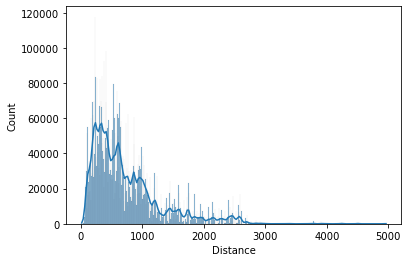

In [6]:
sns.histplot(df["Distance"],kde=True, )
#Nos da una idea de cómo está la función de la densidad dado que kde=True

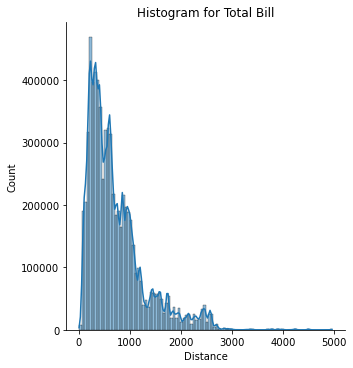

In [15]:
sns.displot(df["Distance"], bins=100, kde=True)
plt.title("Histogram for Total Bill")
plt.show()

(-300.0, 300.0)

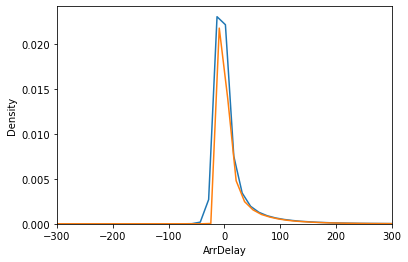

In [17]:
sns.kdeplot(df["ArrDelay"])
sns.kdeplot(df["DepDelay"])

plt.xlim([-300,300])

#Se recomienda verlo con la aproximación de la densidad y no con el histograma en sí

#### Para los diagramas de caja: 

In [18]:
df_2 = df[ df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(500)
plt.xlim([-20,150])

<AxesSubplot:xlabel='DepDelay', ylabel='Origin'>

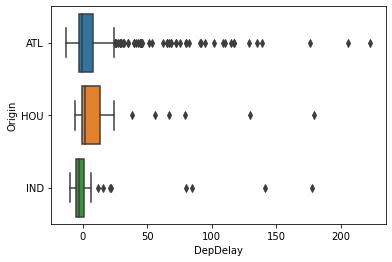

In [19]:
sns.boxplot(x="DepDelay", y="Origin", data=df_2)
#Esto construye un BoxPlot, sirve para apreciar los outliers (son los rombos después de la línea derecha)


Del recuadro azul, se destaca lo siguiente:
* **Línea Central:** Es la mediana (separá el 50% inferior y superior de los casos; es decir, 50% a la izq. y 50% a la der.)
* **Línea Izquierda:**  Es el primer cuartil
* **Línea Derecha:** Es el tercer cuartil

## Nubes de puntos y mapas de calor en Matplotlib

Se muestran varios gráficos de **nubes de puntos** y **mapas de calor**. Se construyen sobre ***matplotlib*** y ***seaborn***.

Primero, se eliminan datos faltantes.

### *Nubes de puntos*

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"C:\COVID_pruebas\base_datos_2008.csv")

df.dropna(inplace=True, subset=["ArrDelay","DepDelay","Distance","AirTime"])

In [7]:
sns.set( rc={'figure.figsize':(15,10)} )
#Esto ajusta el tamaño del gráfico para favorecer la visualización.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


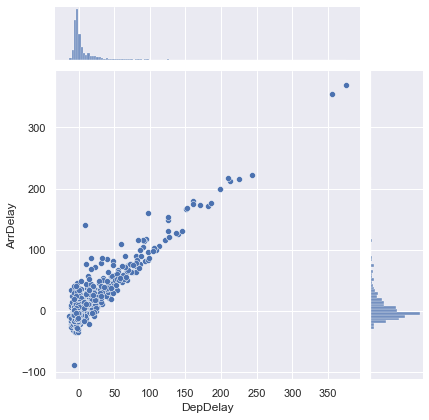

In [11]:
df2 = df[ df["Origin"].isin(["ATL","HOU","IND"]) ].sample(frac=1).head(1000)

sns.jointplot( df2["DepDelay"], df2["ArrDelay"] )
#Para esta nube de puntos, se utiliza la función "joinplot"
# únicamente se requieren dos columnas. 
# gráfico nos permite ver si las columnas están correlacionadas y además, se muestra la distribución de cada columna.

In [15]:
df3 = df2[ np.abs( df2["DepDelay"] )<40 ]
df3 = df3[ np.abs( df3["ArrDelay"] )<40 ]
#Se extraen los vuelos que hayan retrasado en la llegada o salida como máximo en 40 minutos
# Además, que hayan llegado como máximo 40 minutos antes de lo que se planeaba.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


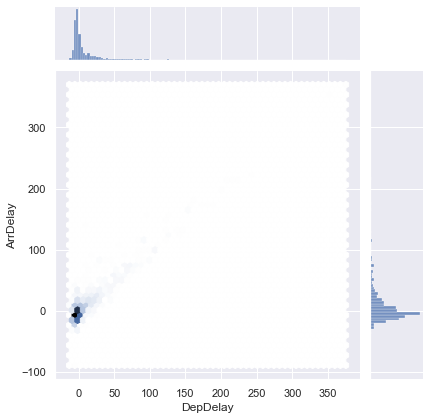

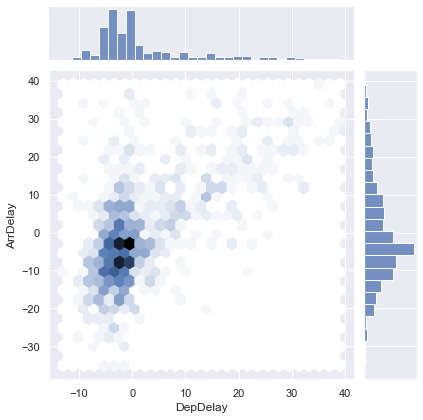

In [23]:
sns.jointplot( df2["DepDelay"], df2["ArrDelay"], kind="hex" )
#Este gráfico no es muy atractivo. Por lo que se aplican los respectivos filtros y se lo aplicamos a df3

sns.jointplot( df3["DepDelay"], df3["ArrDelay"], kind="hex" )
#Se puede visualizar dónde se concentran en mayor medida las variables.
# Se muestra la distribución conjunta
# Se muestra la distribución de cada variable

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


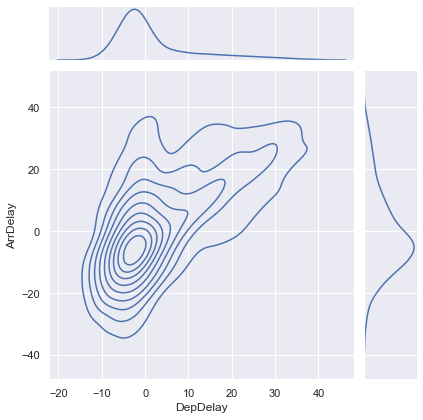

In [24]:
sns.jointplot( df3["DepDelay"], df3["ArrDelay"], kind="kde" )
#Se muestra un mapa de densidad y en vez de hexágonos, se tienen curvas de nivel

### *Mapas de Calor*

In [35]:
gb_df = pd.DataFrame( df2.groupby( ["Origin","Month"], as_index=False )["DepDelay"].mean() )
#Se agrupan según el Orígen y el Mes y se les calcula el promedio de tiempo de retraso
# Las columnas no son un index

gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,12.885246
1,ATL,2,15.309091
2,ATL,3,13.600000
3,ATL,4,14.283582
4,ATL,5,2.222222


In [31]:
data = gb_df.pivot("Month","Origin","DepDelay")
data
#Aquí se construye la tabla, pero es más fácil de leer.

Origin,ATL,HOU,IND
Month,,,
1,12.885246,3.142857,-1.454545
2,15.309091,10.857143,2.000000
3,13.600000,15.142857,51.000000
4,14.283582,5.000000,18.125000
5,2.222222,4.700000,0.833333
6,12.750000,5.384615,4.500000
7,22.358974,1.785714,0.000000
8,14.554217,25.125000,-2.000000
9,3.621212,-2.000000,-4.800000


<AxesSubplot:xlabel='Origin', ylabel='Month'>

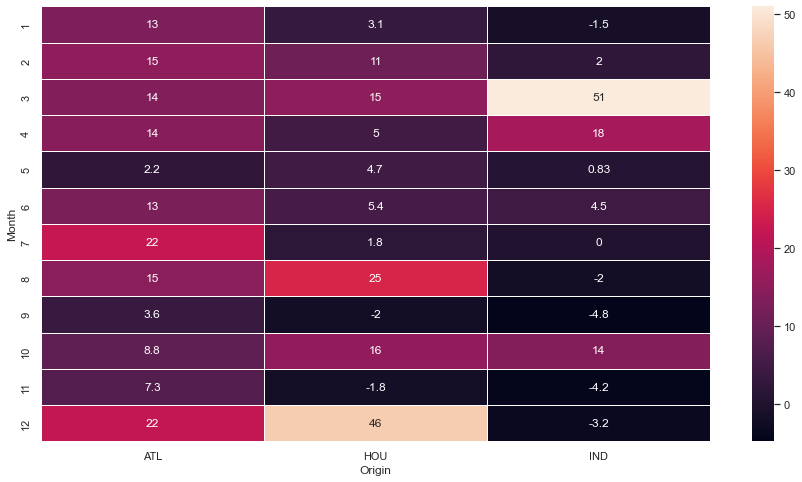

In [36]:
sns.set( rc={ "figure.figsize":(15,8) } )
#Se ajusta el tamaño de gráfico

sns.heatmap( data=data, annot=True, linewidths=.5 )
#La barra vertical de la derecha indica cuál es el mayor retraso. En el mapa se ordenan según los colores.